## Lectura Louisiana






Lectura de los archivos de reviews de Louisiana


In [1]:
import pandas as pd
import numpy as np
import missingno as msxo
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Lectura de archivos json de las reviews efectuadas en el estado de Louisiana . Voy a proceder a realizar la lectura y juntar dichos archivos, al tener todos la misma estructura es posible realizarlo mediante iteracion.

In [2]:
df_1 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Louisiana\1.json', lines= True)
df_2 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Louisiana\2.json', lines= True)
df_3 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Louisiana\3.json', lines= True)
df_4 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Louisiana\4.json', lines= True)
df_5 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Louisiana\5.json', lines= True)
df_6 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Louisiana\6.json', lines= True)
df_7 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Louisiana\7.json', lines= True)
df_8 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Louisiana\8.json', lines= True)
df_9 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Louisiana\9.json', lines= True)
df_10 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Louisiana\10.json', lines= True)


In [3]:
# Creo una lista para poder juntar todos los dataframes de los archivos en uno
dfs = []

# Itero entre cada uno de los dataframes para juntarlos en uno solo
for i in range(1, 11):
    
    df = globals()[f'df_{i}']
    dfs.append(df)


reviews_Louisiana = pd.concat(dfs, ignore_index=True)

In [4]:
# Vista primeros registros
reviews_Louisiana.head(3)

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.101177e+20,Taria Jackson,1583803141563,5,"Reasonably priced, process was easy and fast! ...",None,"{'time': 1583842250926, 'text': 'Taria , thank...",0x86312d61f5ac28b5:0x5e6c55690b65096a
1,1.044371e+20,Jodi Kociaba,1603610106892,5,"Was quick, easy and fun to use the key kiosk.",None,"{'time': 1603631822084, 'text': 'Hello Steve, ...",0x86312d61f5ac28b5:0x5e6c55690b65096a
2,1.089910e+20,Beejal S.,1527773942699,5,"Easy to use, fairly fast. $3.49 for copy of b...",None,None,0x86312d61f5ac28b5:0x5e6c55690b65096a


In [5]:
# Miro cuantos registros tenemos en el dataframe unido

reviews_Louisiana.shape

(1500000, 8)

In [6]:
# Miro el tipo de información

reviews_Louisiana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 8 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   user_id  1500000 non-null  float64
 1   name     1500000 non-null  object 
 2   time     1500000 non-null  int64  
 3   rating   1500000 non-null  int64  
 4   text     789116 non-null   object 
 5   pics     35628 non-null    object 
 6   resp     160140 non-null   object 
 7   gmap_id  1500000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 91.6+ MB


In [7]:
# Checkeo de nulos y su porcentaje

nulls_FL = pd.DataFrame(reviews_Louisiana.isnull().sum().sort_values(ascending = False))
nulls_FL["Porcentaje de nulos"] = round(nulls_FL/reviews_Louisiana.shape[0]*100,2)
nulls_FL.rename(columns = {0:"Nro nulos"})

,Nro nulos,Porcentaje de nulos
pics,1464372,97.62
resp,1339860,89.32
text,710884,47.39
user_id,0,0.00
name,0,0.00
time,0,0.00
rating,0,0.00
gmap_id,0,0.00


In [8]:
columnas= ['pics', 'resp']
reviews_Louisiana= reviews_Louisiana.drop(columns=columnas)

In [9]:
reviews_Louisiana.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'gmap_id'], dtype='object')

In [10]:
reviews_Louisiana.dropna(inplace=True)

In [11]:
usuarios= reviews_Louisiana.user_id.nunique()

In [12]:
reviews= reviews_Louisiana.text.count()

In [13]:
print('En el estado de Louisiana, tenemos',usuarios,' usuarios que dejaron',reviews, 'reseñas.')

En el estado de Louisiana, tenemos 115279  usuarios que dejaron 789116 reseñas.


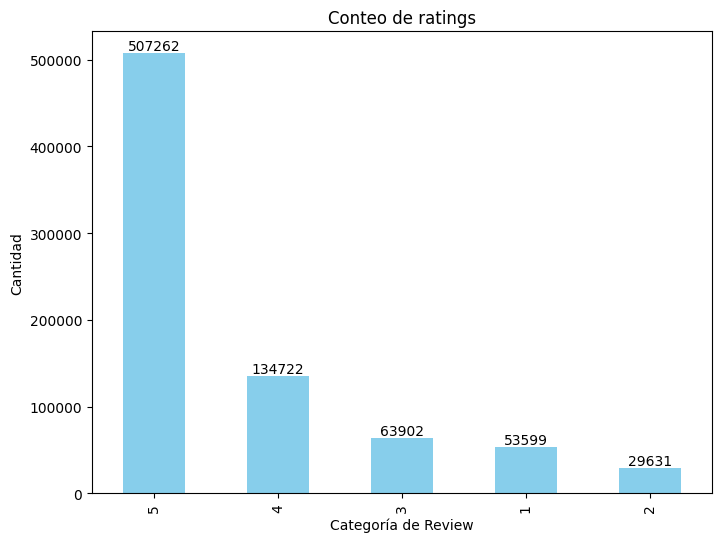

In [14]:
rating = reviews_Louisiana.rating.value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
rating.plot(kind='bar', color='skyblue')

# Agregar etiquetas a las barras
for i, count in enumerate(rating):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Configuración de etiquetas y título
plt.xlabel('Categoría de Review')
plt.ylabel('Cantidad')
plt.title('Conteo de ratings')

# Mostrar el gráfico
plt.show()


In [15]:
reviews_Louisiana['time'] = pd.to_datetime(reviews_Louisiana['time'], unit='ms').dt.strftime('%d/%m/%Y')

In [16]:
reviews_Louisiana['time'] = pd.to_datetime(reviews_Louisiana['time'], format='%d/%m/%Y')

reviews_Louisiana['year'] = reviews_Louisiana['time'].dt.year

In [17]:
min_date = reviews_Louisiana.time.min()
minimun_date = pd.to_datetime(min_date)
print(min_date)
print(minimun_date)

2006-06-21 00:00:00
2006-06-21 00:00:00


In [18]:
max_date = reviews_Louisiana.time.max()
maximun_date = pd.to_datetime(max_date)
print(max_date)
print(maximun_date)

2021-09-07 00:00:00
2021-09-07 00:00:00


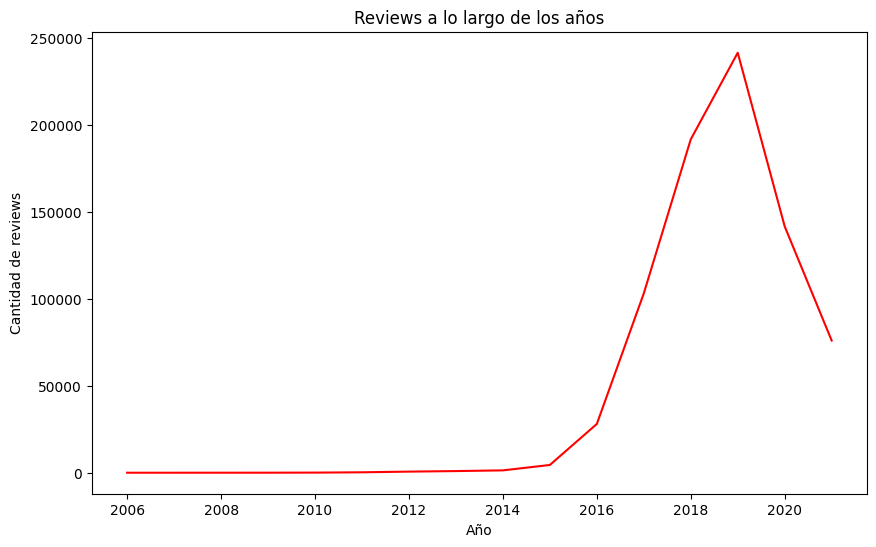

In [19]:
conteo_por_año= reviews_Louisiana[['year', 'text']].groupby('year').count().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=conteo_por_año, x='year', y= 'text', color='red')
plt.xlabel('Año')
plt.ylabel('Cantidad de reviews')
plt.title('Reviews a lo largo de los años')
plt.show()


In [20]:
reviews_Louisiana["text"] = reviews_Louisiana["text"].astype(str)

In [21]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\flori\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\flori\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\flori\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\flori\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


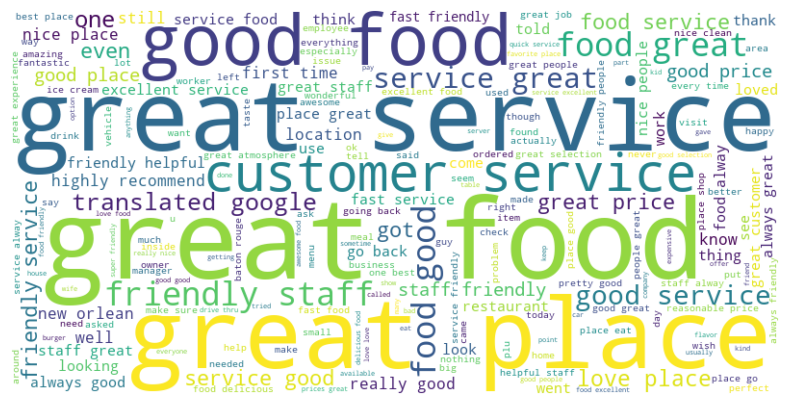

In [22]:
# Assuming you have a DataFrame named "reviews_XXXXXXXXXXXXXXXXXX" with a "text" column
texto = " ".join(reviews_Louisiana["text"])

# Download NLTK data for tokenization and stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Tokenization and removing stopwords
stop_words = set(stopwords.words("english"))
words = word_tokenize(texto)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Join the words into a text string
texto_procesado = " ".join(words)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_procesado)

# Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
